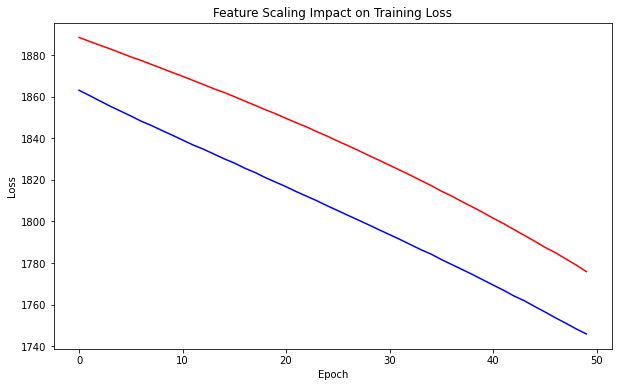

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define a simple neural network
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train model on unscaled data
model_unscaled = build_model()
history_unscaled = model_unscaled.fit(X_train, y_train, epochs=50, verbose=0)

# Train model on scaled data
model_scaled = build_model()
history_scaled = model_scaled.fit(X_train_scaled, y_train, epochs=50, verbose=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(history_unscaled.history['loss'], label='Unscaled Data',color = 'red')
plt.plot(history_scaled.history['loss'], label='Scaled Data',color = 'blue')
plt.title('Feature Scaling Impact on Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.legend()
plt.savefig('ScaledvsUnscaled.png',transparent = True)
plt.show()


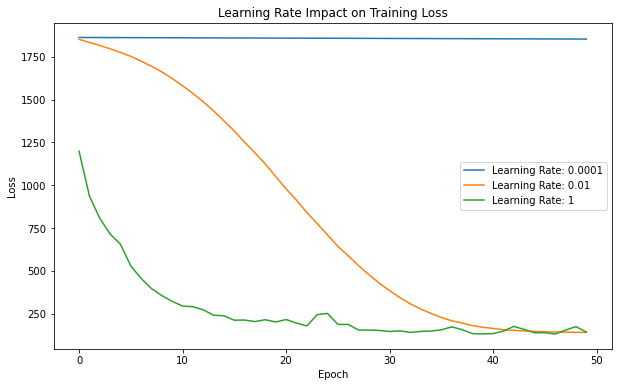

In [5]:
# Assuming build_model() function and dataset preparation from previous example

learning_rates = [0.0001, 0.01, 1]
histories = []

for lr in learning_rates:
    model = build_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=50, verbose=0)
    histories.append(history)

# Plotting
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['loss'], label=f'Learning Rate: {lr}')
plt.title('Learning Rate Impact on Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('LR.png',transparent = True)
plt.show()
